<a href="https://colab.research.google.com/github/Adri720S/Tugas-Analisis-Data/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Adri Sopiana
- **Email:** adrisopiana@apps.ipb.ac.id
- **ID Dicoding:** adrisopiana

## Menentukan Pertanyaan Bisnis

- Bagaimana tingkat penjualan di tahun 2017?
- Produk apa yang memiliki massa rata-rata yang paling besar dan paling ringan?

## Import Semua Packages/Library yang Digunakan

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [54]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [55]:
product_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [56]:
product_categories_name_translation_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/product_category_name_translation.csv")
product_categories_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Dari data order saya mendapatkan informasi tentang kapan waktu pembelian.
- Dari data product saya mendapatkan informasi category product, weight, length, width dan lainnya.

### Assessing Data

In [57]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [58]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [59]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [60]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


### Cleaning Data

In [61]:
orders_df.fillna(value="order_delivered_customer_date", inplace=True)

In [62]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [63]:
product_df.fillna(value="product_category_name", inplace=True)

<ipython-input-63-500a57b1c1ad>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'product_category_name' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  product_df.fillna(value="product_category_name", inplace=True)


In [64]:
product_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight:**
- memperbaiki data orders dan product karena ada missing value

## Exploratory Data Analysis (EDA)

### Explore `orders_df`

In [65]:
# Mengubah kolom 'order_approved_at' menjadi tipe datetime
orders_df['order_approved_at']=pd.to_datetime(orders_df['order_approved_at'], errors='coerce')

# Filter hanya data di tahun 2017
orders_df = orders_df[orders_df['order_approved_at'].dt.year == 2017]

# Set kolom 'order_approved_at' sebagai index
orders_df = orders_df.set_index('order_approved_at')

# Resample per bulan dan hitung jumlah order_id unik
monthly_df = orders_df.resample(rule='M').agg({
    "order_id": "nunique"
})

# Mengubah index menjadi format Tahun-Bulan
monthly_df.index = monthly_df.index.strftime('%B')

# Reset index agar kembali menjadi DataFrame
monthly_df = monthly_df.reset_index()

# Mengganti kolom order_id menjadi order_count
monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)

# Menampilkan hasil
print(monthly_df)

<ipython-input-65-89c3c9ac7bac>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = orders_df.resample(rule='M').agg({


   order_approved_at  order_count
0            January          760
1           February         1765
2              March         2689
3              April         2374
4                May         3693
5               June         3252
6               July         3974
7             August         4348
8          September         4301
9            October         4590
10          November         7395
11          December         5832


In [74]:
# Menggabungkan data 2 dan 3 dengan menyesuaikan nilai pada kolom product_category_name yang berperan sebagai primary key dari product_df dan foreign key dari product_categories_name_translation_df.
# Tujuannya agar nama kategori produk berbahasa inggris
product_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/products_dataset.csv")
product_categories_name_translation_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/product_category_name_translation.csv")

new_product_df = pd.merge(
    left=product_df,
    right=product_categories_name_translation_df,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)
new_product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [67]:
# Pilih kolom yang ingin ditampilkan
df_dipilih = new_product_df[['product_category_name_english', 'product_weight_g']]

# Menampilkan hasilnya
print(df_dipilih)


      product_category_name_english  product_weight_g
0                         perfumery             225.0
1                               art            1000.0
2                    sports_leisure             154.0
3                              baby             371.0
4                        housewares             625.0
...                             ...               ...
32323               furniture_decor           12300.0
32324     construction_tools_lights            1700.0
32325                bed_bath_table            1400.0
32326         computers_accessories             700.0
32327                bed_bath_table            2083.0

[32328 rows x 2 columns]


**Insight:**
- Mengetahui jumlah penjualan produk perbulan di tahun 2017
- Mengetahui massa rata-rata dari setiap kategori produk dengan nama kategorinya dalam bahasa inggris.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tingkat penjualan Produk pada tahun 2017?


In [68]:
monthly_df.head()

,order_approved_at,order_count
0,January,760
1,February,1765
2,March,2689
3,April,2374
4,May,3693


In [69]:
monthly_df.sort_values(by='order_count')

,order_approved_at,order_count
0,January,760
1,February,1765
3,April,2374
2,March,2689
5,June,3252
4,May,3693
6,July,3974
8,September,4301
7,August,4348
9,October,4590


In [70]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)
monthly_df = monthly_df.sort_values("month_numeric")
monthly_df = monthly_df.drop("month_numeric", axis=1)

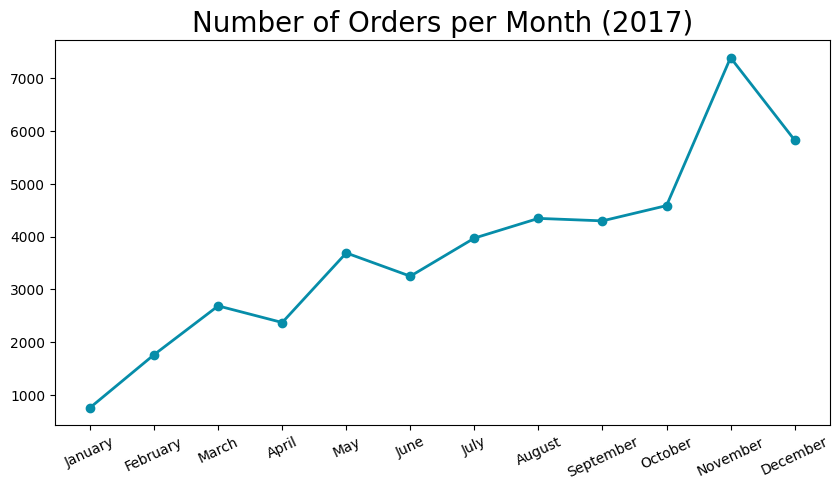

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_df["order_approved_at"],
    monthly_df["order_count"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)
plt.title("Number of Orders per Month (2017)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Produk apa yang memiliki massa rata-rata paling besar dan paling ringan?

<ipython-input-72-3d19c59c68b7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_weight_g", y="product_category_name_english",
<ipython-input-72-3d19c59c68b7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_weight_g", y="product_category_name_english",


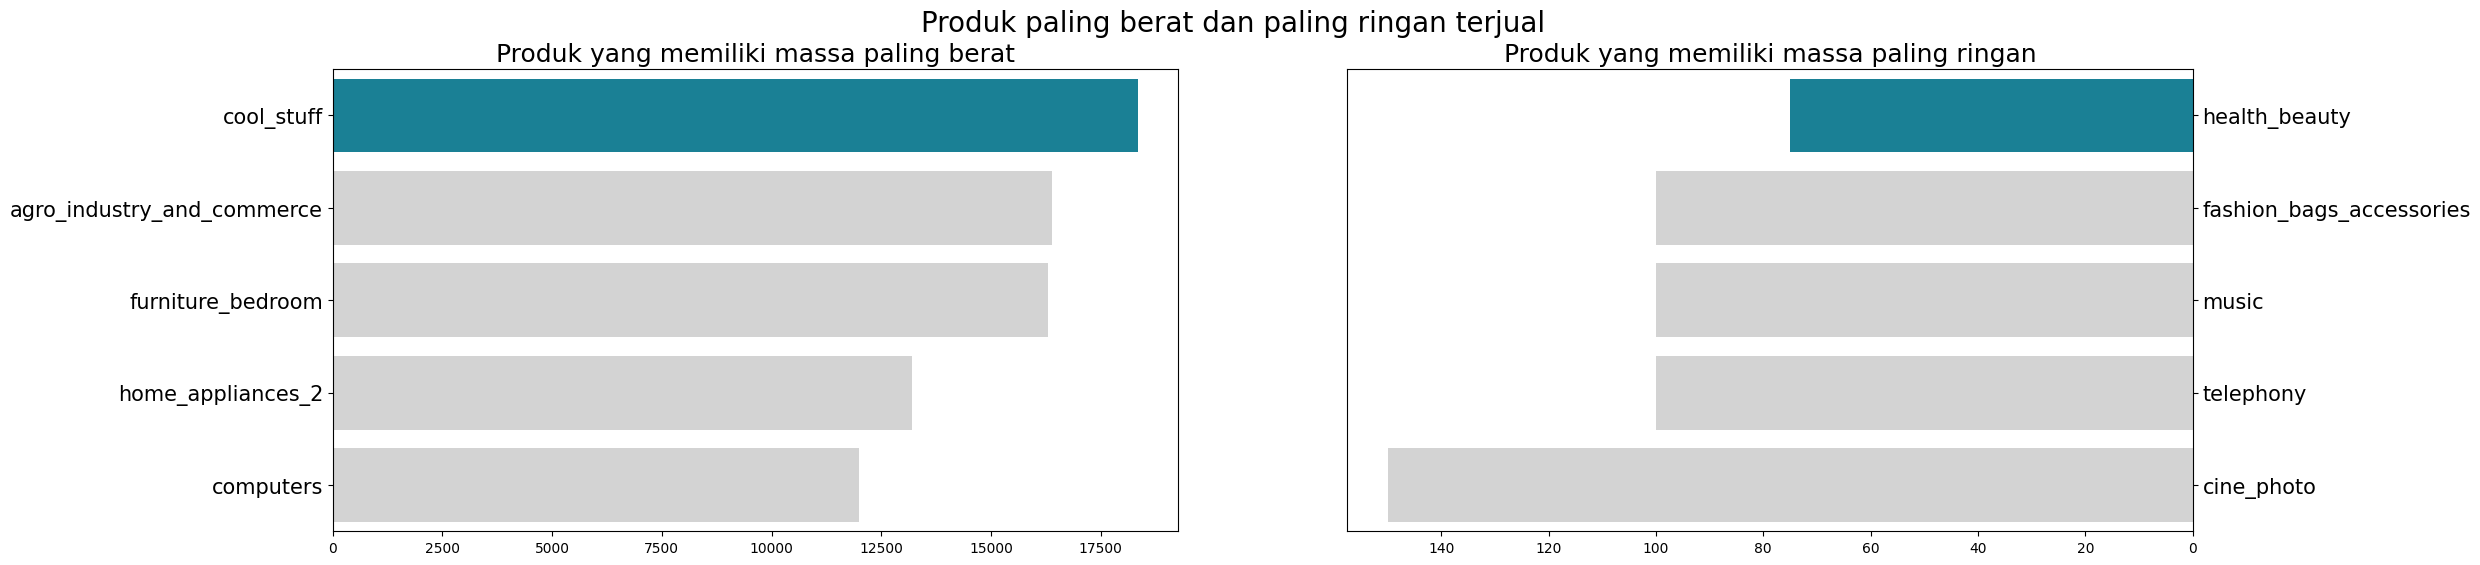

In [72]:
# Menghitung rata-rata berat per kategori
mean_weight_per_category = df_dipilih.groupby('product_category_name_english')['product_weight_g'].mean()

# Hapus duplikat berdasarkan kategori, mempertahankan yang pertama muncul
df_dipilih_unique = df_dipilih.drop_duplicates(subset='product_category_name_english', keep='first')

# Plot 5 produk dengan berat terbesar
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Plot produk dengan berat terbesar (mengambil 5 terbesar)
sns.barplot(x="product_weight_g", y="product_category_name_english",
            data=df_dipilih_unique.sort_values(by="product_weight_g", ascending=False).head(5),
            palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk yang memiliki massa paling berat", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

# Plot produk dengan berat terkecil (mengambil 5 terkecil)
sns.barplot(x="product_weight_g", y="product_category_name_english",
            data=df_dipilih_unique.sort_values(by="product_weight_g", ascending=True).head(5),
            palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk yang memiliki massa paling ringan", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk paling berat dan paling ringan terjual", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1: Tingkat penjualan di tahun 2017 cenderung meningkat
- Conclution pertanyaan 2 : Kategori produk dengan rata-rata massa yang paling berat yaitu cool_stuff dan yang paling ringan yaitu health_beauty